In [1]:
# # install and restart run time 
# !pip install -U albumentations
# !pip install ttach

### Clone from repository

In [2]:
!git clone "https://github.com/jacobgil/pytorch-grad-cam.git"
!git clone "https://github.com/vvshankar78/DeepLearning.git"

fatal: destination path 'pytorch-grad-cam' already exists and is not an empty directory.
fatal: destination path 'DeepLearning' already exists and is not an empty directory.


In [3]:
import sys, os

my_path = 'DeepLearning/Extensive VisionAI-EVA6/08_Resnet'
sys.path.append(my_path)
# os.listdir(my_path)

my_path_cam = '/content/pytorch-grad-cam'
sys.path.append(my_path_cam)

In [4]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
import matplotlib
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import StepLR

In [6]:
# from model import Net2
from models import Resnet
from models import my_model
from train import train
from test1 import test
from config import ModelConfig
from utils import *
from data.data_engine import DataEngine

In [7]:
# View model config
args = ModelConfig()
args.dropout_value = 0.0
args.print_config()

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.0,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1}


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


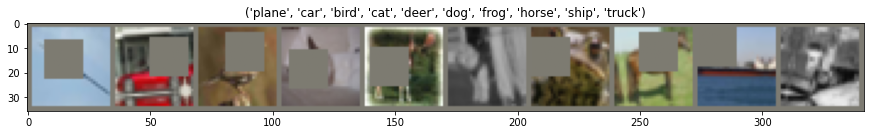

In [8]:
data = DataEngine(args)
data.show_samples()

In [9]:
train_loader = data.train_loader
test_loader = data.test_loader

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

#dict to store model loss and accuracy parameters
history = {}

CUDA Available? True


In [10]:
# Input parameters for the model
EPOCHS = 20
l1_decay=0.000
l2_decay=0.0
#norm_type = "BN"
#num_groups=2
#input_img_size=(1, 28, 28)

# Run model for first 20 epochs with high rate, and half it thereafter
# model = Net2(args).to(device)
model = Resnet.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=25, gamma=0.5)

# run_model(model, optimizer, scheduler, EPOCHS, l1=0.0, l2=0.0)

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
misclassified_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_loss_list, train_accuracy_list = train(model, device, train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, train_loss_list, train_accuracy_list)
    print("\nlearning rate", optimizer.param_groups[0]['lr'])
    scheduler.step()
    # test(model1, device, test_loader, test_losses, test_acc, misclassified_imgs, epoch==EPOCHS-1)
    test_loss_list, test_accuracy_list, misclassified_imgs = test(model, device, test_loader, criterion, classes, test_loss_list, test_accuracy_list, misclassified_imgs, epoch==EPOCHS-1)

name = 'Resnet18'
history[name] = {}
history[name]['train_loss'] = train_loss_list
history[name]['train_accuracy'] = train_accuracy_list
history[name]['test_loss'] = test_loss_list
history[name]['test_accuracy'] = test_accuracy_list
history[name]['misclassified_imgs'] = misclassified_imgs

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
DeepLearning/Extensive VisionAI-EVA6/08_Resnet/models/Resnet.py:109: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out)
Loss=1.7735689878463745 Batch_id=781 Accuracy=42.25: 100%|██████████| 782/782 [00:37<00:00, 20.88it/s]

length of Average loss 782, length of Average accuracy 782

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0182, Accuracy: 5863/10000 (58.63%)

EPOCH: 2


Loss=0.899225652217865 Batch_id=781 Accuracy=58.89: 100%|██████████| 782/782 [00:37<00:00, 20.91it/s]

length of Average loss 1564, length of Average accuracy 1564

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0140, Accuracy: 6929/10000 (69.29%)

EPOCH: 3


Loss=0.7952053546905518 Batch_id=781 Accuracy=65.83: 100%|██████████| 782/782 [00:37<00:00, 20.96it/s]

length of Average loss 2346, length of Average accuracy 2346

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0123, Accuracy: 7334/10000 (73.34%)

EPOCH: 4


Loss=0.6402578353881836 Batch_id=781 Accuracy=68.85: 100%|██████████| 782/782 [00:37<00:00, 20.90it/s]

length of Average loss 3128, length of Average accuracy 3128

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0123, Accuracy: 7464/10000 (74.64%)

EPOCH: 5


Loss=0.6257945895195007 Batch_id=781 Accuracy=71.79: 100%|██████████| 782/782 [00:37<00:00, 20.83it/s]

length of Average loss 3910, length of Average accuracy 3910

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 7972/10000 (79.72%)

EPOCH: 6


Loss=0.3886967599391937 Batch_id=781 Accuracy=73.95: 100%|██████████| 782/782 [00:37<00:00, 20.86it/s]

length of Average loss 4692, length of Average accuracy 4692

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 8176/10000 (81.76%)

EPOCH: 7


Loss=1.150722861289978 Batch_id=781 Accuracy=75.31: 100%|██████████| 782/782 [00:37<00:00, 20.85it/s]

length of Average loss 5474, length of Average accuracy 5474

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0081, Accuracy: 8242/10000 (82.42%)

EPOCH: 8


Loss=0.42857295274734497 Batch_id=781 Accuracy=76.71: 100%|██████████| 782/782 [00:37<00:00, 20.88it/s]

length of Average loss 6256, length of Average accuracy 6256

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0082, Accuracy: 8266/10000 (82.66%)

EPOCH: 9


Loss=0.6295309066772461 Batch_id=781 Accuracy=77.61: 100%|██████████| 782/782 [00:37<00:00, 20.82it/s]

length of Average loss 7038, length of Average accuracy 7038

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8392/10000 (83.92%)

EPOCH: 10


Loss=1.035209059715271 Batch_id=781 Accuracy=78.91: 100%|██████████| 782/782 [00:37<00:00, 20.83it/s]

length of Average loss 7820, length of Average accuracy 7820

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0073, Accuracy: 8486/10000 (84.86%)

EPOCH: 11


Loss=0.64510577917099 Batch_id=781 Accuracy=79.72: 100%|██████████| 782/782 [00:37<00:00, 20.87it/s]

length of Average loss 8602, length of Average accuracy 8602

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0077, Accuracy: 8385/10000 (83.85%)

EPOCH: 12


Loss=0.8323646783828735 Batch_id=781 Accuracy=80.39: 100%|██████████| 782/782 [00:37<00:00, 20.80it/s]

length of Average loss 9384, length of Average accuracy 9384

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 90 %
Accuracy of   car : 92 %
Accuracy of  bird : 75 %
Accuracy of   cat : 69 %
Accuracy of  deer : 89 %
Accuracy of   dog : 80 %
Accuracy of  frog : 88 %
Accuracy of horse : 94 %
Accuracy of  ship : 98 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0064, Accuracy: 8613/10000 (86.13%)

EPOCH: 13


Loss=0.4666634798049927 Batch_id=781 Accuracy=81.34: 100%|██████████| 782/782 [00:38<00:00, 20.53it/s]

length of Average loss 10166, length of Average accuracy 10166

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 94 %
Accuracy of  bird : 88 %
Accuracy of   cat : 73 %
Accuracy of  deer : 81 %
Accuracy of   dog : 61 %
Accuracy of  frog : 93 %
Accuracy of horse : 86 %
Accuracy of  ship : 96 %
Accuracy of truck : 83 %

Test set: Average loss: 0.0066, Accuracy: 8613/10000 (86.13%)

EPOCH: 14


Loss=0.8446186780929565 Batch_id=781 Accuracy=81.80: 100%|██████████| 782/782 [00:38<00:00, 20.46it/s]

length of Average loss 10948, length of Average accuracy 10948

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 86 %
Accuracy of   car : 93 %
Accuracy of  bird : 93 %
Accuracy of   cat : 79 %
Accuracy of  deer : 79 %
Accuracy of   dog : 78 %
Accuracy of  frog : 97 %
Accuracy of horse : 89 %
Accuracy of  ship : 89 %
Accuracy of truck : 100 %

Test set: Average loss: 0.0056, Accuracy: 8771/10000 (87.71%)

EPOCH: 15


Loss=0.1377478390932083 Batch_id=781 Accuracy=82.44: 100%|██████████| 782/782 [00:38<00:00, 20.22it/s]

length of Average loss 11730, length of Average accuracy 11730

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 96 %
Accuracy of   car : 98 %
Accuracy of  bird : 73 %
Accuracy of   cat : 75 %
Accuracy of  deer : 84 %
Accuracy of   dog : 79 %
Accuracy of  frog : 88 %
Accuracy of horse : 86 %
Accuracy of  ship : 92 %
Accuracy of truck : 87 %

Test set: Average loss: 0.0057, Accuracy: 8778/10000 (87.78%)

EPOCH: 16


Loss=0.18821361660957336 Batch_id=781 Accuracy=82.87: 100%|██████████| 782/782 [00:38<00:00, 20.35it/s]

length of Average loss 12512, length of Average accuracy 12512

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 86 %
Accuracy of   car : 92 %
Accuracy of  bird : 93 %
Accuracy of   cat : 84 %
Accuracy of  deer : 78 %
Accuracy of   dog : 70 %
Accuracy of  frog : 96 %
Accuracy of horse : 96 %
Accuracy of  ship : 88 %
Accuracy of truck : 93 %

Test set: Average loss: 0.0055, Accuracy: 8759/10000 (87.59%)

EPOCH: 17


Loss=0.9239768385887146 Batch_id=781 Accuracy=83.50: 100%|██████████| 782/782 [00:37<00:00, 20.62it/s]

length of Average loss 13294, length of Average accuracy 13294

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 83 %
Accuracy of   car : 97 %
Accuracy of  bird : 72 %
Accuracy of   cat : 56 %
Accuracy of  deer : 95 %
Accuracy of   dog : 88 %
Accuracy of  frog : 93 %
Accuracy of horse : 95 %
Accuracy of  ship : 94 %
Accuracy of truck : 94 %

Test set: Average loss: 0.0065, Accuracy: 8617/10000 (86.17%)

EPOCH: 18


Loss=0.7423369884490967 Batch_id=781 Accuracy=83.90: 100%|██████████| 782/782 [00:37<00:00, 20.64it/s]

length of Average loss 14076, length of Average accuracy 14076

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 85 %
Accuracy of   car : 98 %
Accuracy of  bird : 88 %
Accuracy of   cat : 47 %
Accuracy of  deer : 97 %
Accuracy of   dog : 95 %
Accuracy of  frog : 96 %
Accuracy of horse : 88 %
Accuracy of  ship : 90 %
Accuracy of truck : 91 %

Test set: Average loss: 0.0061, Accuracy: 8708/10000 (87.08%)

EPOCH: 19


Loss=0.2875030040740967 Batch_id=781 Accuracy=84.35: 100%|██████████| 782/782 [00:38<00:00, 20.46it/s]

length of Average loss 14858, length of Average accuracy 14858

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]


Accuracy of plane : 95 %
Accuracy of   car : 88 %
Accuracy of  bird : 81 %
Accuracy of   cat : 73 %
Accuracy of  deer : 89 %
Accuracy of   dog : 76 %
Accuracy of  frog : 95 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 96 %

Test set: Average loss: 0.0051, Accuracy: 8862/10000 (88.62%)

EPOCH: 20


Loss=0.7722230553627014 Batch_id=781 Accuracy=85.05: 100%|██████████| 782/782 [00:37<00:00, 20.62it/s]

length of Average loss 15640, length of Average accuracy 15640

learning rate 0.01



Accuracy of plane : 96 %
Accuracy of   car : 94 %
Accuracy of  bird : 80 %
Accuracy of   cat : 65 %
Accuracy of  deer : 95 %
Accuracy of   dog : 84 %
Accuracy of  frog : 91 %
Accuracy of horse : 89 %
Accuracy of  ship : 97 %
Accuracy of truck : 95 %

Test set: Average loss: 0.0051, Accuracy: 8895/10000 (88.95%)



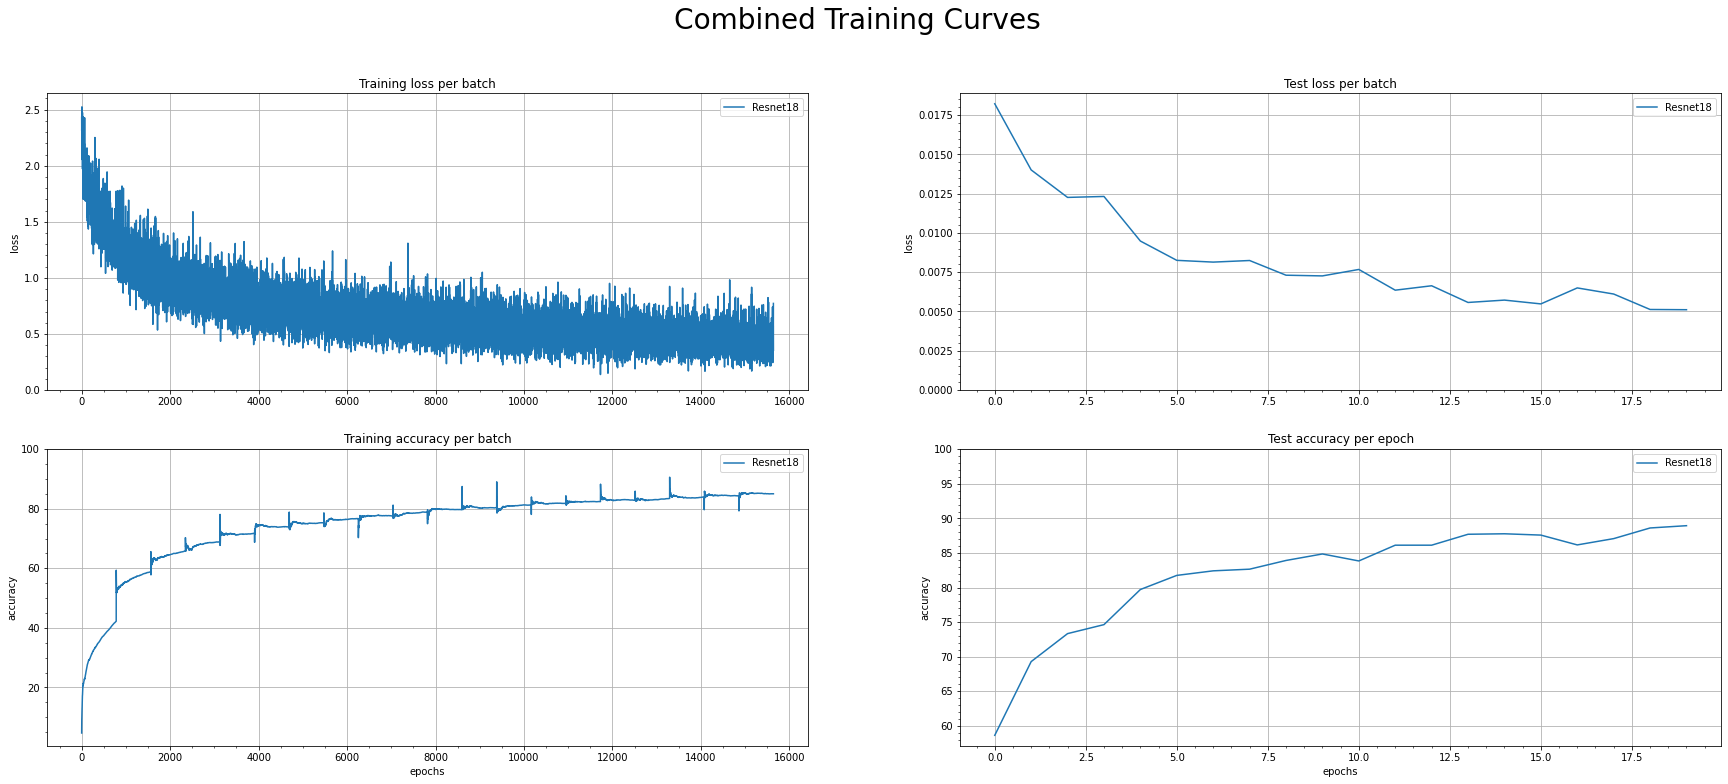

In [11]:
training_curves(history)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
DeepLearning/Extensive VisionAI-EVA6/08_Resnet/models/Resnet.py:109: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out)


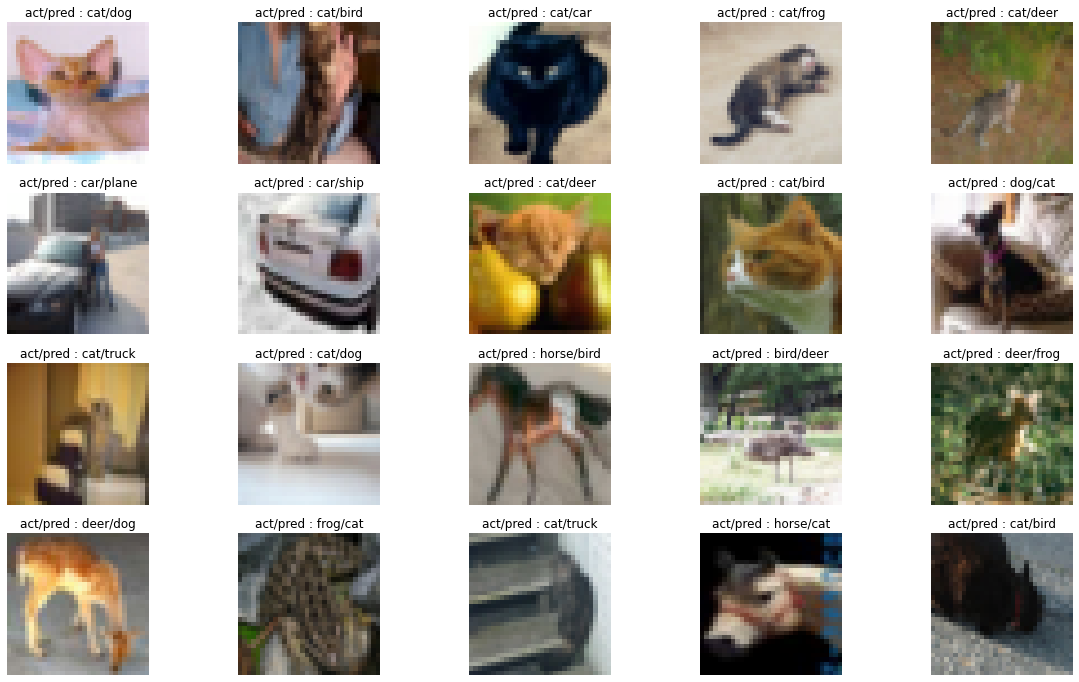

In [12]:
misclass_img_list, misclass_img_category = show_misclassified(model, test_loader, device, classes, num_of_images=20)

In [13]:
save_misclassified_img(misclass_img_list)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
DeepLearning/Extensive VisionAI-EVA6/08_Resnet/models/Resnet.py:109: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out)
/content/pytorch-grad-cam/pytorch_grad_cam/base_cam.py:85: RuntimeWarning: invalid value encountered in true_divide
  img = img / np.max(img)


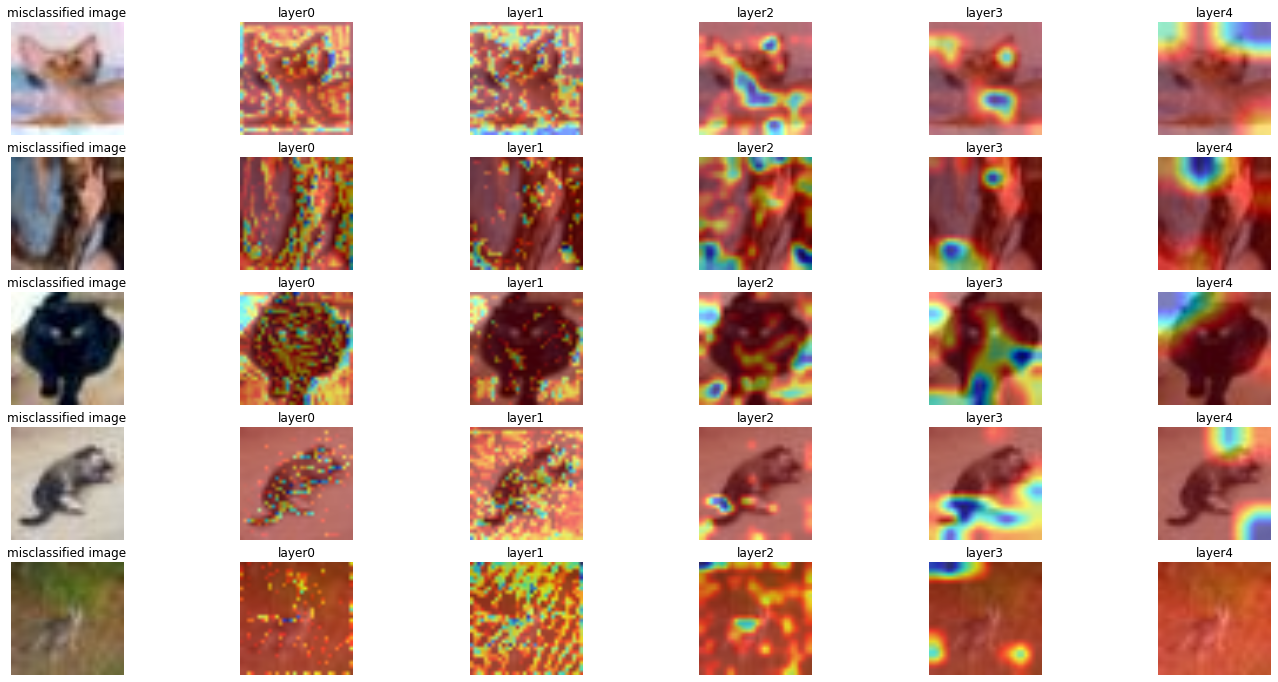

In [14]:
visualization = Generate_CAM(model, misclass_img_category, 20, cuda)
CAM_show_image(visualization, 0)

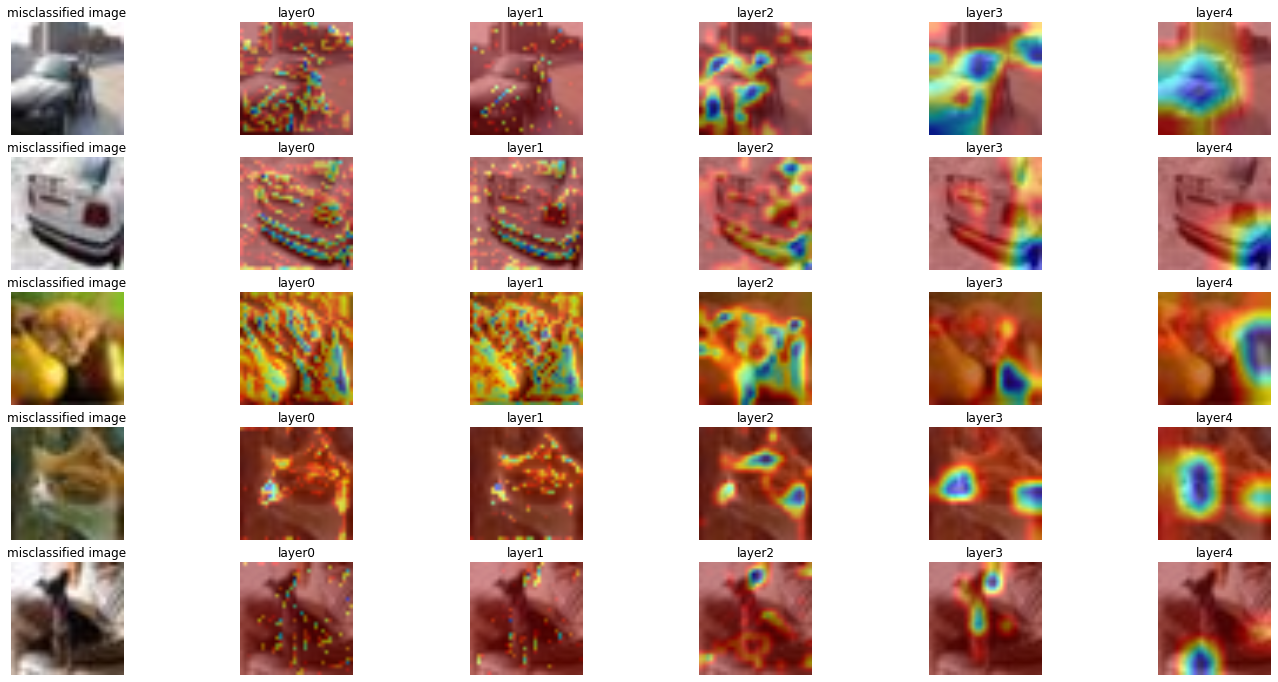

In [15]:
CAM_show_image(visualization, 30)